### Import libraries


In [1]:
#Load libraries

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

### Load and Preprocess data

In [2]:

# Open the image file
image_path = 'fish\Bacterial diseases - Aeromoniasis/Bacterial diseases - Aeromoniasis (1).jpg'
image = Image.open(image_path)

# Get the size (width, height) of the image
image_size = image.size
print(f"Image size: {image_size}")


Image size: (224, 224)


In [3]:
# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [4]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(0 if class_name == 'Healthy Fish' else 1)


# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

fish\Bacterial diseases - Aeromoniasis
fish\Bacterial gill disease
fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


In [5]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
num_classes = 2  # Healthy and Sick
labels = to_categorical(labels, num_classes)

In [7]:
# Split the data into training, validation, and test sets
x_train, x, y_train, y = train_test_split(data, labels, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 2) 
The shape of validation data :(46, 128, 128, 3),(46, 2) 
The shape of test data :(46, 128, 128, 3),(46, 2) 


In [8]:
# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

### Create a Model

In [9]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.3),
    Dense(num_classes, activation='sigmoid')
])



In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [11]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

### Train the model

In [12]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


12/12 [==============================] - 13s 868ms/step - loss: 0.7515 - accuracy: 0.5299 - val_loss: 0.6420 - val_accuracy: 0.7174
Epoch 2/10
12/12 [==============================] - 11s 876ms/step - loss: 0.6922 - accuracy: 0.6005 - val_loss: 0.6423 - val_accuracy: 0.7174
Epoch 3/10
12/12 [==============================] - 12s 976ms/step - loss: 0.6757 - accuracy: 0.6005 - val_loss: 0.6684 - val_accuracy: 0.7174
Epoch 4/10
12/12 [==============================] - 12s 1s/step - loss: 0.6712 - accuracy: 0.6005 - val_loss: 0.6661 - val_accuracy: 0.7174
Epoch 5/10
12/12 [==============================] - 12s 968ms/step - loss: 0.6612 - accuracy: 0.6005 - val_loss: 0.6469 - val_accuracy: 0.7174
Epoch 6/10
12/12 [==============================] - 12s 981ms/step - loss: 0.6522 - accuracy: 0.6033 - val_loss: 0.6308 - val_accuracy: 0.7174
Epoch 7/10
12/12 [==============================] - 12s 990ms/step - loss: 0.6408 - accuracy: 0.6549 - val_loss: 0.5927 - val_accuracy: 0.7391


### Visualize the model performance

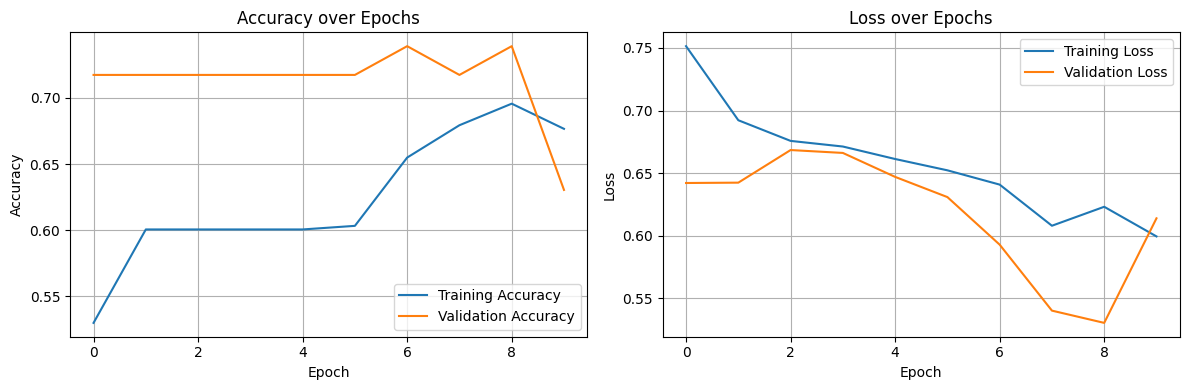

In [13]:
plt.figure(figsize=(12, 4))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


### Evaluate on the test set

In [14]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(datagen.flow(x_test, y_test))
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

2/2 [==============================] - 1s 104ms/step - loss: 0.5567 - accuracy: 0.7826
Test Accuracy: 0.78
Test Loss: 0.56


In [15]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

2/2 [==============================] - 0s 99ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.80      0.83      0.81        29

    accuracy                           0.76        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.76      0.76      0.76        46



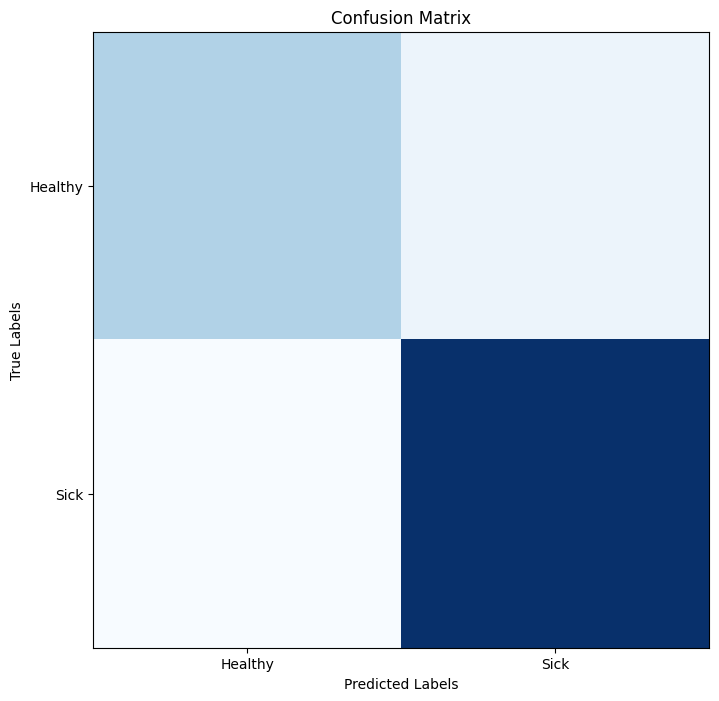

In [16]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Frågor:


### • Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.

### • Har du använt någon databehandling? Varför?


### • Utvärdera modellens prestanda.

### • Är prestandan bra? Varför/ varför inte?

### • Vad hade du kunnat göra för att förbättra den ytterligare?

In [17]:
# Create a Model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(num_classes, activation='sigmoid')
])